# Анализ данных осень 2021
# Основные библиотеки

Лекции будут вестись в Jupyter. Это интерактивная среда разработки (не только) для Python. Ей далеко до полноценной ide, но для анализа данных она подходит намного лучше других

## Python

- [Установка](https://www.python.org/downloads/) под windows

- Как ставить пакеты: на этой лекции будем использовать [pip](https://pip.pypa.io/en/stable/installation/), на следующей разберём, почему так делать не стоит

### Различие между версиями Python

Сейчас большая часть разработки ведётся на python 3.6+, потому что в нём:

1. В базовый синтаксис языка добавили поддержку async функий

   Многопоточность в python является большой проблемой из-за однопоточной архитектуры самого интерпретатора языка. Параллелизация програм с помощью Threads и Processes в питоне имеет свои минусы. В это время async функции ближе всего похожи на корутины из нормальных языков
   
2. Изменился синтаксис функции print. Это сломало обратную совместимость python2 и python3

3. Язык стал экономить память: многие объекты стали хранить только текущее состояние

    Например range(N) в прошлых версиях возвращал список из N порядковых чисел, что могло сильно тратить память. Теперь это итератор

4. Появилась поддержка unicode

    Теперь переменные можно называть по-русски, и это сделало переход с 1С на python более простым. Из менее ироничных плюсов: это дало возможность использовавть строки с любыми символами

5. Псевдотипизация

    Возможно единственное полезное изменение. В язык добавили типовые аннотации. Теперь можно явно указывать тип аргументов и возвращаемый тип. Но это бы сделало python слишком похожим на нормальный язык. Подвох заключается в том, что аннотации не влияют на работу кода - проверок типов нет ни в runtime, ни при запуске. Но всё не так плохо, недостатки языка исправляются сообществом, и на следующей лекции мы рассмотрим как именно

### Global Interpreter Lock

[GIL](https://habr.com/ru/post/84629/) ограничивает паралелльное выполнение потоков. Как архитектурное решение GIL помогло языку быстрее работать на процессорах с малым количеством ядер. Но сейчас производители процессоров стараются создать видимость выполнения закона Мура на данных о количестве ядер в процессорах, поэтому появляются процессоры с 32, 64 и большим количеством ядер. В этих условиях GIL ощутим и создаёт немало проблем при попытке параллельной обработки данных

---

## pandas

Нужен для работы с табличными данными

### Установка

In [ ]:
!pip3 install -U pandas

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) библиотеки, [примеры](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) и [github](https://github.com/pandas-dev/pandas)

In [2]:
import pandas as pd

### загрузка из .csv файла

In [3]:
# набор данных о биржевых котировках золота

df = pd.read_csv('data/raw/FINAL_USO.csv')

# Можно посмотреть часть таблицы
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/FINAL_USO.csv'

### Краткое описание данных

In [3]:
# Основная информация об устройстве датафрейма:
# Названия колонок количество записей, типы колонок, количество пропусков в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [4]:
# Простые статистики данных
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


### Типы данных

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# К колонкам можно обращаться как через индекс, так и через точку

type(df['Volume']), type(df.Volume)

(pandas.core.series.Series, pandas.core.series.Series)

### Векторизованные вычисления

In [7]:
# Исходные данные

# Объекты в pandas оптимизированы для векторизованных операций, выбор отдельных
# элементов - дорогостоящая операция. Нужно использовать векторизованное применение функций

df.Volume

0       21521900
1       18124300
2       12547200
3        9136300
4       11996100
          ...   
1713     9736400
1714    14293500
1715    11874400
1716     6864700
1717     8449400
Name: Volume, Length: 1718, dtype: int64

In [8]:
# Применение встроенных математических функций к серии

df.Volume.pow(0.5)

0       4639.170184
1       4257.264380
2       3542.202705
3       3022.631304
4       3463.538653
           ...     
1713    3120.320496
1714    3780.674543
1715    3445.925130
1716    2620.057251
1717    2906.785166
Name: Volume, Length: 1718, dtype: float64

In [9]:
# Применение произвольных функций для векторизованных вычислений

# .apply(f) применяет функцию f к каждому элементу серии
from math import sqrt

def custom_sqrt(value: int) -> float:
    return sqrt(value)

df.Volume.apply(custom_sqrt)

0       4639.170184
1       4257.264380
2       3542.202705
3       3022.631304
4       3463.538653
           ...     
1713    3120.320496
1714    3780.674543
1715    3445.925130
1716    2620.057251
1717    2906.785166
Name: Volume, Length: 1718, dtype: float64

### Выборки из датафрейма

In [10]:
# Выбор элементов по номеру строки в датафрейме
# Выбор строк со 2 по 4

df.iloc[2:4]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600


In [11]:
# Установка индексной колонки помогает повысить скорость выбора по этой колонке
# loc выбирает строки, чьё значение соответствует заданному

records = df.set_index('Open').loc[155.479996]
# Возвращённое значение - серия из 1 элемента
print(type(records))
records

<class 'pandas.core.series.Series'>


Date             2011-12-19
High             155.860001
Low              154.360001
Close            154.869995
Adj Close        154.869995
                    ...    
USO_High          36.450001
USO_Low               35.93
USO_Close         36.200001
USO_Adj Close     36.200001
USO_Volume          7418200
Name: 155.479996, Length: 80, dtype: object

In [12]:
# По умолчанию индексная колонка - это номер записи в датафрейме, нумерация с 0
# Поэтому .loc[] по умолчанию возвращает строки по _значению_ индексной колонки в датафрейме
df.loc[:2]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200


In [13]:
# Также с помощью .loc[] можно задавать маску для выбора строк
(df.Open < 102).head()

0    False
1    False
2    False
3    False
4    False
Name: Open, dtype: bool

In [14]:
df.loc[df.Open < 102]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
950,2015-11-27,101.010002,101.620003,100.989998,101.250000,101.250000,4993600,209.429993,209.800003,208.860001,...,13.37,13.45,13.121325,38458000,13.09,13.11,13.00,13.03,13.03,10619600
951,2015-11-30,101.529999,102.379997,101.519997,101.919998,101.919998,6773000,209.750000,209.889999,208.559998,...,13.52,13.76,13.423749,43282800,13.18,13.23,12.90,12.93,12.93,22160200
953,2015-12-02,101.349998,101.349998,100.529999,100.690002,100.690002,10223500,210.619995,211.000000,208.229996,...,13.62,13.79,13.453015,59197500,12.77,13.03,12.38,12.48,12.48,52543800
954,2015-12-03,101.230003,101.970001,100.849998,101.760002,101.760002,6499900,208.830002,209.149994,204.750000,...,13.86,14.08,13.735929,51983700,12.59,12.97,12.45,12.77,12.77,35997400
960,2015-12-11,101.910004,103.320000,101.849998,103.110001,103.110001,6798400,203.350006,204.139999,201.509995,...,14.03,14.38,14.028598,47148500,11.30,11.33,11.00,11.07,11.07,44460900
962,2015-12-15,101.709999,102.059998,101.410004,101.519997,101.519997,6831100,204.699997,206.110001,202.869995,...,13.51,13.63,13.296926,37161500,11.33,11.65,11.25,11.40,11.40,35892100
964,2015-12-17,100.919998,100.989998,100.230003,100.500000,100.500000,10156200,208.399994,208.479996,204.839996,...,13.30,13.34,13.014012,92531900,10.95,10.95,10.71,10.74,10.74,30064600
965,2015-12-18,101.349998,102.529999,101.300003,102.040001,102.040001,8345900,202.770004,202.929993,199.830002,...,13.48,13.64,13.306681,62472400,10.81,10.99,10.62,10.66,10.66,37112500
972,2015-12-30,101.470001,101.599998,101.349998,101.419998,101.419998,3745000,207.110001,207.210007,205.759995,...,13.57,13.66,13.440495,40319300,10.96,11.00,10.84,10.93,10.93,24796400
973,2015-12-31,101.480003,101.720001,101.309998,101.459999,101.459999,3823600,205.130005,205.889999,203.869995,...,13.60,13.72,13.499532,27523300,10.84,11.24,10.82,11.00,11.00,30362300


In [15]:
# Маска может быть сложным условием
df.loc[(df.Open < 102) & (df.Close > 102)]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
960,2015-12-11,101.910004,103.320000,101.849998,103.110001,103.110001,6798400,203.350006,204.139999,201.509995,...,14.03,14.38,14.028598,47148500,11.30,11.33,11.00,11.07,11.07,44460900
965,2015-12-18,101.349998,102.529999,101.300003,102.040001,102.040001,8345900,202.770004,202.929993,199.830002,...,13.48,13.64,13.306681,62472400,10.81,10.99,10.62,10.66,10.66,37112500


In [16]:
# Выбор таких колонок, чьё значение удовлетворяет предикату "за день цена поднялась более чем на 4"
df.loc[df.Close - df.Open > 4]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
26,2012-01-25,161.070007,166.550003,160.289993,166.419998,166.419998,28957700,131.259995,132.869995,130.750000,...,51.270000,55.23,52.488239,26995600,37.820000,38.580002,37.490002,38.349998,38.349998,14198600
340,2013-05-20,130.880005,135.320007,130.850006,135.119995,135.119995,21594000,166.779999,167.580002,166.610001,...,26.240000,28.02,26.904129,39215400,34.080002,34.590000,34.020000,34.439999,34.439999,3742300
419,2013-09-18,125.320000,132.160004,125.150002,132.009995,132.009995,24780000,171.009995,173.520004,170.580002,...,25.469999,28.25,27.124969,114753100,37.889999,38.799999,37.810001,38.680000,38.680000,7837200


In [17]:
# всё это можно делать без loc
df[df.Close - df.Open > 4]

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
26,2012-01-25,161.070007,166.550003,160.289993,166.419998,166.419998,28957700,131.259995,132.869995,130.750000,...,51.270000,55.23,52.488239,26995600,37.820000,38.580002,37.490002,38.349998,38.349998,14198600
340,2013-05-20,130.880005,135.320007,130.850006,135.119995,135.119995,21594000,166.779999,167.580002,166.610001,...,26.240000,28.02,26.904129,39215400,34.080002,34.590000,34.020000,34.439999,34.439999,3742300
419,2013-09-18,125.320000,132.160004,125.150002,132.009995,132.009995,24780000,171.009995,173.520004,170.580002,...,25.469999,28.25,27.124969,114753100,37.889999,38.799999,37.810001,38.680000,38.680000,7837200


### Обработка данных


In [18]:
# pipe - для применения функций с дополнительными аргументами

# .pipe(f) применяет функцию f к серии. Позволяет пробрасывать 
# дополнительные аргументы, в данном случае n
def twice_and_n(value: pd.Series, n: int) -> pd.Series:
    return 2 * value + n

df.Open.head()

0    154.740005
1    154.309998
2    155.479996
3    156.820007
4    156.979996
Name: Open, dtype: float64

In [19]:
df.Open.pipe(twice_and_n, n=100).head()

0    409.480010
1    408.619996
2    410.959992
3    413.640014
4    413.959992
Name: Open, dtype: float64

In [20]:
# assign - для создание новой колонки
# groupby - группировка по выбранным колонкам

# Создание колонки Год и подсчёт средней цены за год
def get_year(series: pd.Series) -> pd.Series:
    return series.str.slice(0, 4)


df.assign(year=df.Date.pipe(get_year)) \
  .groupby('year') \
  .Open \
  .mean()

year
2011    154.671819
2012    161.807347
2013    137.464305
2014    121.834408
2015    111.118840
2016    119.418871
2017    119.677823
2018    120.233105
Name: Open, dtype: float64

In [21]:
# rename - для переименования колонок
df.rename(columns={'Open':  'open',
                   'Close': 'close'},
          inplace=False)

,Date,open,High,Low,close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


### Соединение таблиц

In [22]:
# создание двух произвольных таблиц

data1 = [(1, 2),
         (1, 3),
         (2, 3),
         (2, 5)]

data2 = [(2, 'a'),
         (3, 'b'),
         (5, 'c')]

df1 = pd.DataFrame.from_records(data1, columns=['user_id', 'item_id'])
df2 = pd.DataFrame.from_records(data2, columns=['item_id', 'item_name'])

df1

,user_id,item_id
0,1,2
1,1,3
2,2,3
3,2,5


In [23]:
df2

,item_id,item_name
0,2,a
1,3,b
2,5,c


In [24]:
# join таблиц
# можно делать left, right, inner и outer соединения

df3 = pd.merge(df1, df2, on='item_id', how='inner')
df3

,user_id,item_id,item_name
0,1,2,a
1,1,3,b
2,2,3,b
3,2,5,c


### Экспорт в файл

In [25]:
df3.to_csv('data/customer_goods.csv')

In [26]:
# просмотр содержимого файла с помощью bash команды

!cat data/customer_goods.csv

,user_id,item_id,item_name
0,1,2,a
1,1,3,b
2,2,3,b
3,2,5,c


<AxesSubplot:>

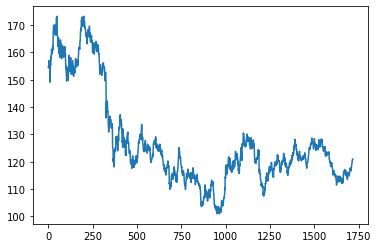

In [28]:
# С помощью pandas можно строить графики, потому что рассмотренные в этой 
# лекции библиотеки интегрированы друг в друга
df.Open.plot()

---

## matplotlib

Нужна для рисования графиков


### Установка

In [ ]:
!pip3 install -U matplotlib

[Документация](https://matplotlib.org/stable/contents.html) библиотеки, [примеры графиков](https://matplotlib.org/stable/gallery/index.html#mplot3d-examples-index) и [github](https://github.com/matplotlib/matplotlib/)

In [29]:
import matplotlib.pyplot as plt

# default figure size
plt.rcParams['figure.figsize'] = (12, 7)

### Простые графики

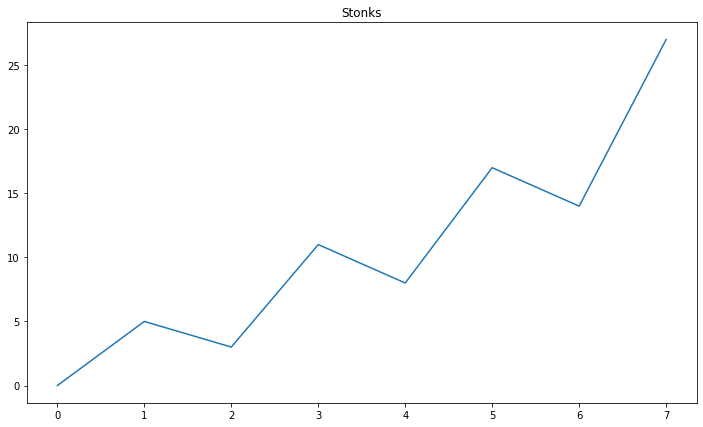

In [30]:
# График по произвольным данным

x = [0, 5, 3, 11, 8, 17, 14, 27]

plt.plot(x)
plt.title('Stonks')
plt.show()

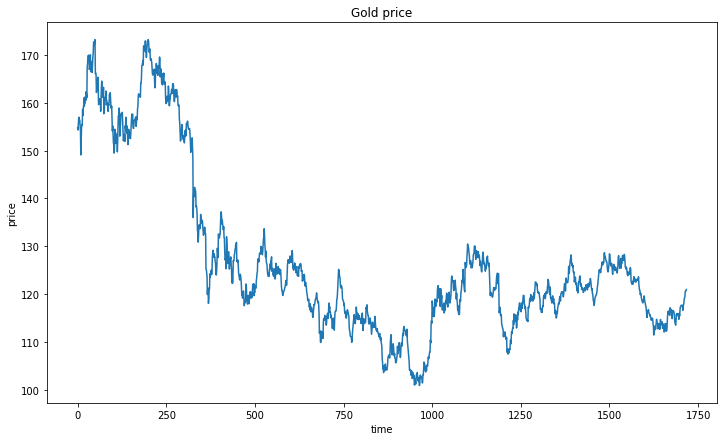

In [31]:
# У графиков есть много дополнительных параметров

gold = pd.read_csv('data/raw/FINAL_USO.csv')

plt.plot(gold.Open,
#          alpha=0.5,     # Меняет прозрачность графика
#          color='red',
#          dashes=[3, 5], # рисование пунктиром из 2 линий, длина первой - 3, длина второй - 5
         )

# В основе графика лежит тип plt.Figure, который можно кастомизировать
plt.title('Gold price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

### Гистограммы

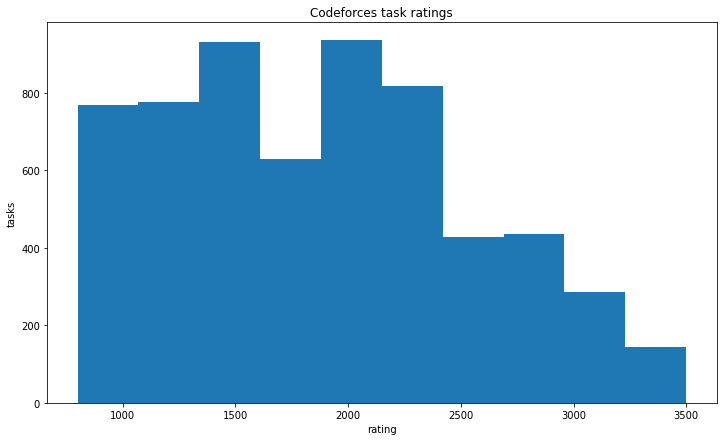

In [32]:
# Гистограмма показывает количество элементов (ось у), имеющих конкретное значение (ось х)
codeforces = pd.read_csv('data/raw/codeforces.tsv', sep='\t')

plt.hist(codeforces.rating,
#          bins=codeforces.rating.nunique(), # Меняет количество колонок
#          rwidth=0.5,                       # Меняет расстояние между колонками
#          density=True,                     # Заменяет количественное отображение на оси у на вероятностое
#          cumulative=True,                  # Вместо функции плотности рисует функцию распределения величины
#          orientation='horizontal',         # Изменяет ориентацию гистограммы
#          color='green'
        )
plt.title('Codeforces task ratings')
plt.xlabel('rating')
plt.ylabel('tasks')
plt.show()

### 2d гистограммы

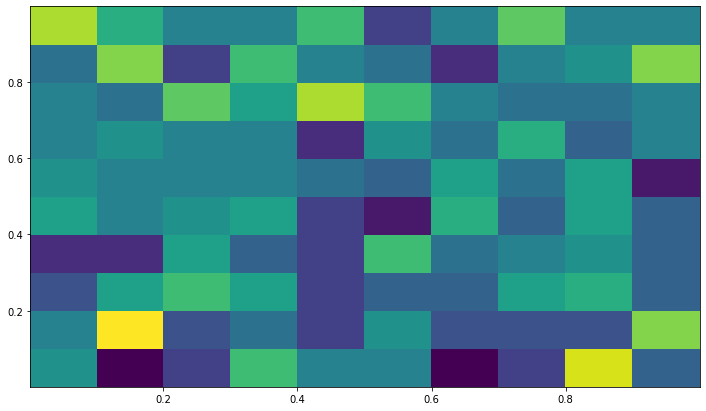

In [33]:
import random

k = 1000
rand_x = [random.random() for _ in range(k)]
rand_y = [random.random() for _ in range(k)]

plt.hist2d(rand_x, rand_y)
plt.show()

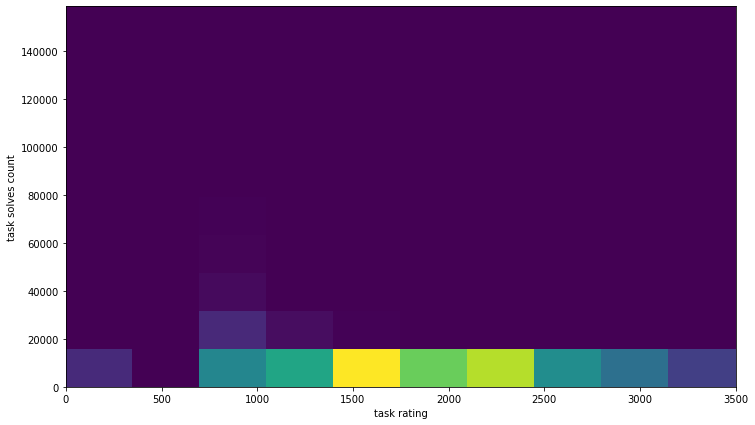

In [35]:
# Заполнение отсутствующих полей нулями
codeforces.fillna(0, inplace=True)

# На этой 2д гистограмме удобно смотреть и сравнивать распределения количества
# решений задачи по всем рейтингам одновременно, что нельзя сделать по одной гистограмме

plt.hist2d(codeforces.rating, 
           codeforces.solved_count,
#            bins=30
          )
plt.xlabel('task rating')
plt.ylabel('task solves count')
# plt.ylim(0, 40000)
plt.show()

### Рассеяния

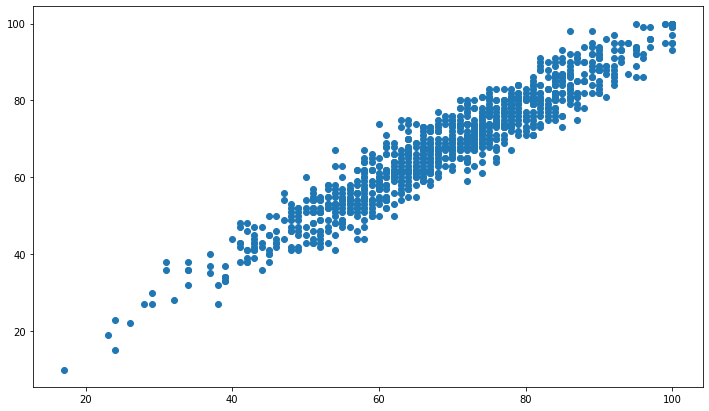

In [36]:
# Рассеяние показывает множество точек в двухмерном пространстве

exams = pd.read_csv('data/raw/StudentsPerformance.csv')

plt.scatter(exams['reading score'], 
            exams['writing score'],
#             s=3,  # Меняет размер точки
           )

### Boxplots

In [37]:
# В датасете песен спотифай посмотрим распределение характеристик песен
df = pd.read_csv('data/raw/spotify_dataset.csv')

# Возьмём часть характеристик
song_features = [ 
    'Danceability', 
    'Energy', 
    'Speechiness',
    'Acousticness', 
    'Liveness',
    'Valence'
]
df = df[song_features]

# Удалим строки с недостающими значениями
df = df[(df == ' ').sum(axis=1) == 0].astype(float)

df.head(5)

,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence
0,0.714,0.800,0.0504,0.1270,0.3590,0.589
1,0.591,0.764,0.0483,0.0383,0.1030,0.478
2,0.563,0.664,0.1540,0.3350,0.0849,0.688
3,0.808,0.897,0.0348,0.0469,0.3640,0.591
4,0.736,0.704,0.0615,0.0203,0.0501,0.894


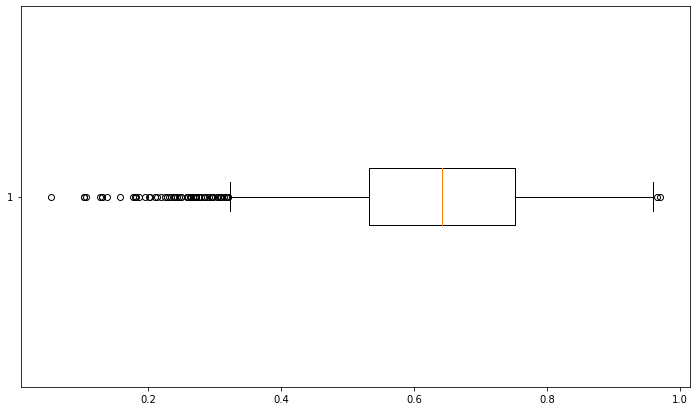

In [38]:
# график по одной характиристике - энергичности песни 

plt.boxplot(df.Energy,
            vert=False, # Ориентация графика
            whis=0.95,  # Насколько редкие записи будут находиться вне "усов" boxplot'а
                        # 0.95 означает, что не будут охвачены записи, которые встречаются
                        # реже, чем 5% данных. Более строгое определение квантиля будет 
                        # будет дано в следующих лекциях
           )
plt.show()

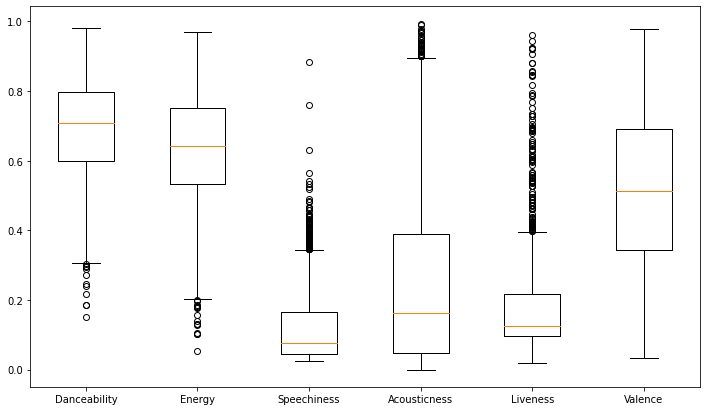

In [39]:
# Графики по остальным параметрам

plt.boxplot(df, labels=df.columns)
plt.show()

### Считывание изображений

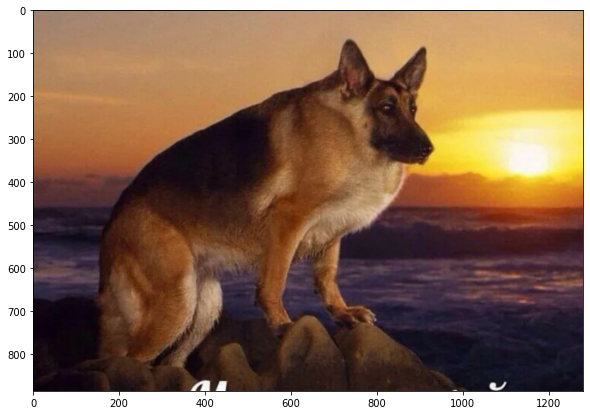

In [40]:
img = plt.imread('data/raw/maks.jpg')
plt.imshow(img)

### Анимация

saved


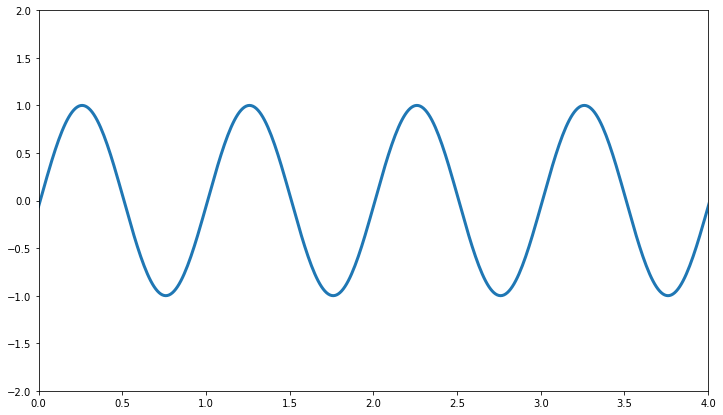

In [41]:
from math import sin, pi
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)


def init():
    # Начальный момент анимации
    line.set_data([], [])
    return (line, )


def animate(step: int):
    # Вычисление графика на заданном шаге анимации
    x = [x / 100 for x in range(1000)]
    y = [sin(2 * pi * (xi + 0.01 * step)) for xi in x]
    line.set_data(x, y)
    return line,


anim = FuncAnimation(fig, 
                     animate, 
                     init_func=init,
                     frames=100,    # Количество кадров в анимации
                     interval=30,   # Интервал между кадрами (мсек)
                     ) 


anim.save('sine_wave.gif')
print('saved')

### 3d графики

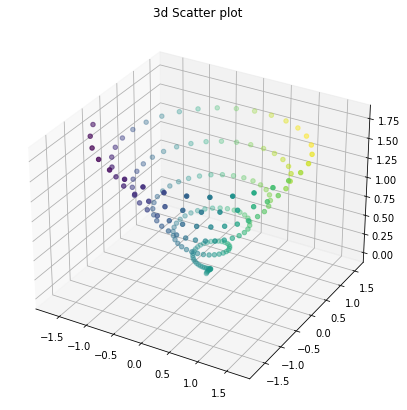

In [42]:
from math import sin, cos
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

z = [x / 100 for x in range(180)]
x = [zi * sin(20 * zi) for zi in z]
y = [zi * cos(20 * zi) for zi in z]

# Хитрая формула цвета зависит от координат точки
color = [xi + yi for xi, yi in zip(x, y)]

ax.scatter(x, y, z, c=color)
ax.set_title('3d Scatter plot')
plt.show()

## numpy

Нужен для работы с многомерными массивами

### Установка

In [ ]:
!pip3 install -U numpy

[Документация](https://numpy.org/doc/stable/reference/index.html) библиотеки, [примеры](https://numpy.org/doc/stable/user/quickstart.html) и [github](https://github.com/numpy/numpy)

In [43]:
import numpy as np

### Создание массива

In [44]:
arr = np.array([1, 2, 3, 4, 5])
arr = np.random.randint(low=0, high=5, size=(10,))
arr = np.linspace(start=0, stop=5, num=10)
arr = np.arange(start=0, stop=5, step=0.5)
arr = 10 * arr
arr

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.])

### Случайные числа

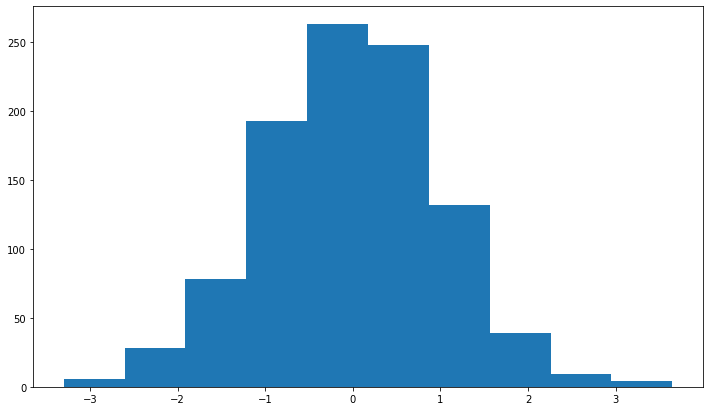

In [45]:
plt.hist(np.random.normal(size=(1000, 1)))
plt.show()

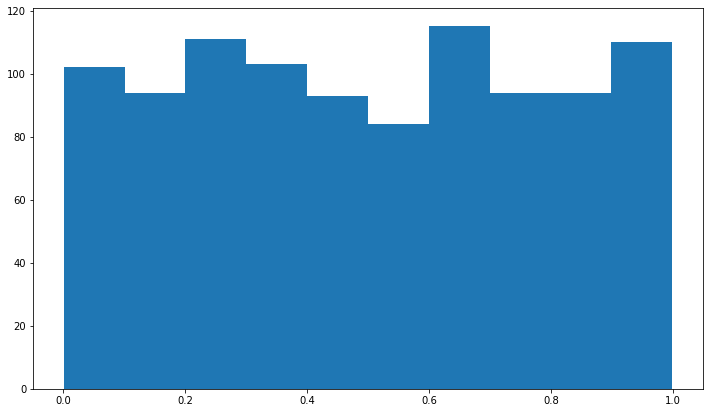

In [46]:
plt.hist(np.random.uniform(size=(1000, 1)))
plt.show()

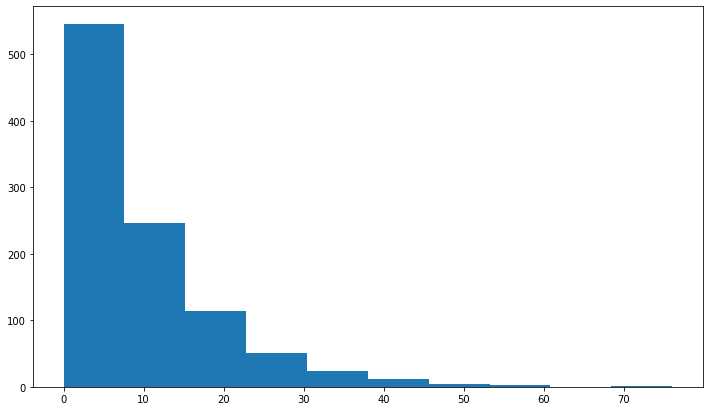

In [47]:
plt.hist(np.random.exponential(10, size=(1000, 1)))
plt.show()

### Векторные операции

In [48]:
arr = np.arange(1, 10, 0.5)
arr *= 3
np.sqrt(arr)
arr

array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ,
       19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5])

In [49]:
# Поэлеменетные операции
arr + arr

array([ 6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36., 39., 42.,
       45., 48., 51., 54., 57.])

In [50]:
# Умножение векторов
arr.reshape(1, -1).dot(arr)

array([5555.25])

In [51]:
# Умножение матриц
m = np.random.random(size=(10, 10))
res = m.T @ m
res.shape

(10, 10)

In [52]:
# Матричные операции
np.linalg.inv(m)

array([[ -5.07969344,  -2.53165779,  -0.53987313,  -2.34305573,
        -14.02164265,  21.67634601,  -4.53384922, -13.17711937,
         16.18397798,   5.04938552],
       [  3.49064862,   0.60009912,  -0.57290025,   1.18009938,
          6.74777379, -11.04913798,   2.8420908 ,   7.03233361,
         -8.78517001,  -1.76125838],
       [ -1.12975872,  -0.27893045,   0.70390657,   1.25454675,
         -0.07177073,   0.93842734,  -0.22855504,  -0.74901661,
          0.30738661,  -0.71697532],
       [  4.63214438,   1.98073733,   1.44813494,   4.37875787,
         15.88134082, -21.38255073,   4.20922255,  15.28070334,
        -18.08128646,  -8.72982964],
       [ -2.41703321,  -0.36037765,  -1.49312557,  -2.64605906,
         -8.99408007,  11.87233323,  -2.37160422,  -7.88184765,
          9.67869484,   5.1598057 ],
       [  6.32545545,   2.79287269,   1.64266602,   4.03871136,
         19.63782461, -27.23127241,   5.30735912,  18.49896214,
        -22.9605055 ,  -8.57324395],
       [  

### Выборки из массивов

In [53]:
arr = np.arange(1, 10, 0.5)
arr[arr > 6]

array([6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [54]:
arr[(arr > 6) & (arr < 8)]

array([6.5, 7. , 7.5])

In [55]:
# Выбор по рядам и столбцам
m = np.random.random(size=(10, 3))
m[1, :]

array([0.81371255, 0.53581128, 0.83433355])

### Fast Fourier transform

В Numpy содержится много полезных алгоритмов, реализация которых заняла бы много времени. Примером может быть преобразование Фурье - метод разложения сигнала на ряд простых сигналов

Попробуем применить его для вычисления характеристик сложного сигнала 

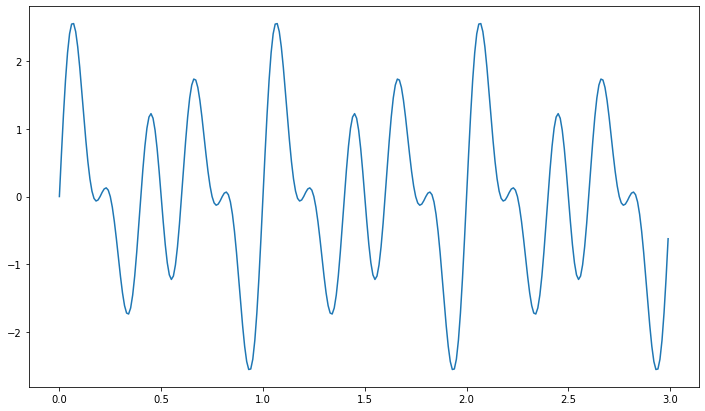

In [56]:
# Придумаем сложный сигнал

# Наш сигнал будет иметь 100 измерений в секунду
SAMPLE_RATE = 100
x = np.arange(0, 3, step=(1 / SAMPLE_RATE))
a, b, c = 2, 3, 5
d, e = 1.3, 3.4
f = lambda x: np.sin(2 * np.pi * a * x) + \
              np.sin(2 * np.pi * b * x) + \
              np.sin(2 * np.pi * c * x) #+ \
#               np.sin(2 * np.pi * d * x) + \
#               np.sin(2 * np.pi * e * x) 
y = f(x)

plt.plot(x, y)
plt.show()

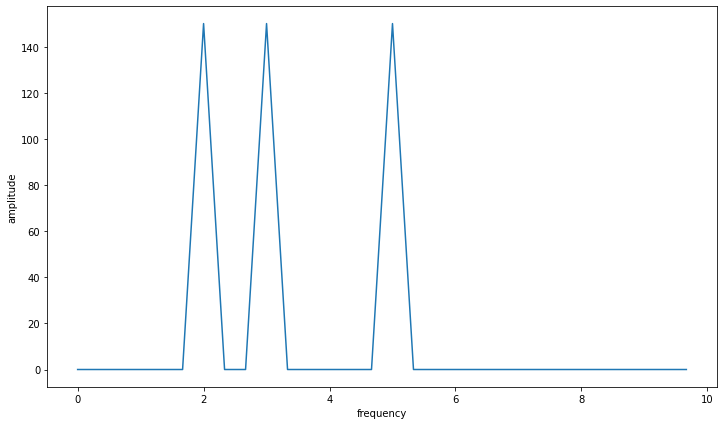

In [57]:
# Длительность сигнала
DURATION = len(y) // SAMPLE_RATE
# Количество измерений
N = SAMPLE_RATE * DURATION

# rfft - real fast fourier transform. Для визуализации нам достаточно вещественной 
# части комплекной переменной
yf = np.fft.rfft(y[:N])
xf = np.fft.rfftfreq(N, 1 / SAMPLE_RATE)

# Количество частот на оси x
k = 30
plt.plot(xf[:k], np.abs(yf)[:k])
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

# Мы получили пики на частотах 2, 3 и 5. Ровно такие частоты мы задали сами в сложном сигнале

## sklearn

Нужна для обучения простых моделей из классического машинного обучения

### Установка

In [ ]:
!pip3 install -U scikit-learn

[Документация](https://scikit-learn.org/stable/modules/classes.html), [примеры](https://scikit-learn.org/stable/user_guide.html) и [github](https://github.com/scikit-learn/scikit-learn)

In [59]:
import sklearn as sk

### Модели машинного обучения

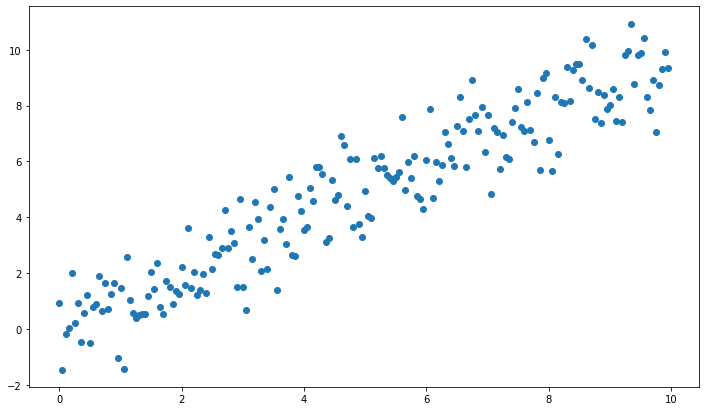

In [60]:
# Набор случайных данных

x = np.arange(0, 10, 0.05)
y = x + np.random.normal(size=x.shape)

plt.scatter(x, y)
plt.show()

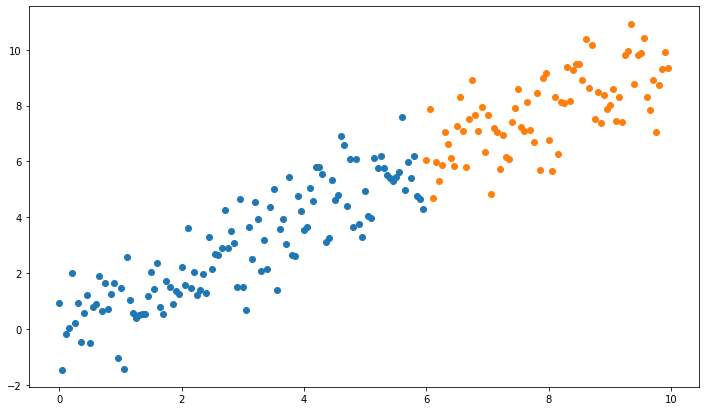

In [61]:
# Прячем от модели часть данных

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, shuffle=False)
plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show()

In [62]:
# Строим статистическую модель
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(train_x.reshape(-1, 1), train_y)

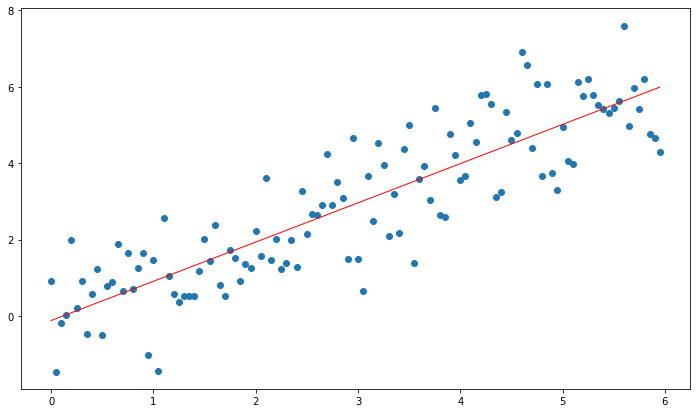

In [63]:
# Визуализируем модель на данных

# y = k * x + b
model_line = lambda x: model.coef_[0] * x + model.intercept_

plt.scatter(train_x, train_y)
plt.plot(train_x, model_line(train_x), linewidth=1, color='red')
plt.show()

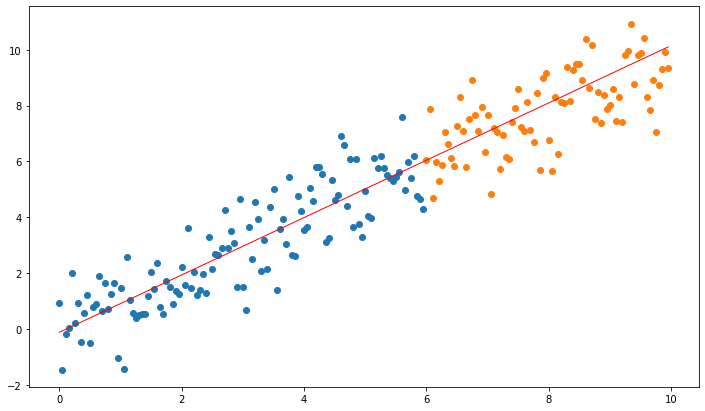

In [64]:
### Визуализация модели на второй части выборки

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.plot(x, model.predict(x.reshape(-1, 1)), linewidth=1, color='red')
plt.show()

Все sklearn модели реализуют fit-predict интерфейс